## Research Question 6: Sentiment on Topic level

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle


### Import Topic Information

In [257]:
cat_df = pd.read_csv('wikispeedia_paths-and-graph/categories.tsv', sep='\t', skiprows=13, header=None)
cat_df.columns = ['article', 'category']
cat_df.category = cat_df.category.str.replace('_',' ')
cat_df[['category_lvl1', 'category_lvl2']] = cat_df['category'].str.split('.', expand=True)[[1,2]]
cat_df = cat_df.drop(columns=['category'])

cat_df

,article,category_lvl1,category_lvl2
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,History,British History
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People,Historical figures
2,%C3%85land,Countries,None
3,%C3%85land,Geography,European Geography
4,%C3%89douard_Manet,People,Artists
...,...,...,...
5199,Zirconium,Science,Chemistry
5200,Zoroaster,People,Religious figures and leaders
5201,Zuid-Gelders,Geography,European Geography
5202,Zuid-Gelders,Language and literature,Languages


### Merge with sentiment scores

In [182]:

with open('sentiments.pickle', 'rb') as file:
    sentiment_score = pickle.load(file)
articles_df = pd.DataFrame(sentiment_score).T.reset_index()
articles_df.columns = ['article', 'neg', 'neu', 'pos']
articles_df = articles_df.drop(columns=['neu'])

articles_df.article = articles_df.article.str[:-4]
articles_df

,article,neg,pos
0,Matter,0.235663,0.095422
1,Common_Tern,0.152064,0.097202
2,Restoration_literature,0.169710,0.132469
3,European_Kingfisher,0.076588,0.132150
4,Abuja,0.119582,0.208275
...,...,...,...
4599,Last_Supper,0.075478,0.158055
4600,Culture_of_the_Democratic_Republic_of_the_Congo,0.190738,0.089011
4601,Paleontology,0.041307,0.353286
4602,Achilles_tendon,0.251968,0.056279


In [183]:
articles_df = articles_df.merge(cat_df,on='article', how='left')
articles_df

,article,neg,pos,category_lvl1,category_lvl2
0,Matter,0.235663,0.095422,Science,Physics
1,Common_Tern,0.152064,0.097202,Science,Biology
2,Restoration_literature,0.169710,0.132469,Language and literature,Literature types
3,European_Kingfisher,0.076588,0.132150,Science,Biology
4,Abuja,0.119582,0.208275,Geography,African Geography
...,...,...,...,...,...
5205,Last_Supper,0.075478,0.158055,Religion,Religious texts
5206,Culture_of_the_Democratic_Republic_of_the_Congo,0.190738,0.089011,Geography,African Geography
5207,Paleontology,0.041307,0.353286,Geography,General Geography
5208,Achilles_tendon,0.251968,0.056279,Science,Biology


### Evaluate on Most General Topics (Level 1)

In [240]:
temp = articles_df.copy().groupby('category_lvl1')[['neg', 'pos']].mean().reset_index()
temp['sentiment'] = 0  # Default class is neutral (0)

# Assigning class labels based on conditions
temp.loc[temp['neg'] > temp['neg'].mean(), 'sentiment'] = -1  # Negative class
temp.loc[temp['pos'] > temp['pos'].mean(), 'sentiment'] = 1  # Positive class

temp

,category_lvl1,neg,pos,sentiment
0,Art,0.108214,0.156693,1
1,Business Studies,0.179589,0.139119,-1
2,Citizenship,0.219874,0.104897,-1
3,Countries,0.176955,0.128537,-1
4,Design and Technology,0.151030,0.143760,1
5,Everyday life,0.148628,0.165738,1
6,Geography,0.161224,0.132010,-1
7,History,0.221581,0.090100,-1
8,IT,0.145361,0.199694,1
9,Language and literature,0.169410,0.134165,-1


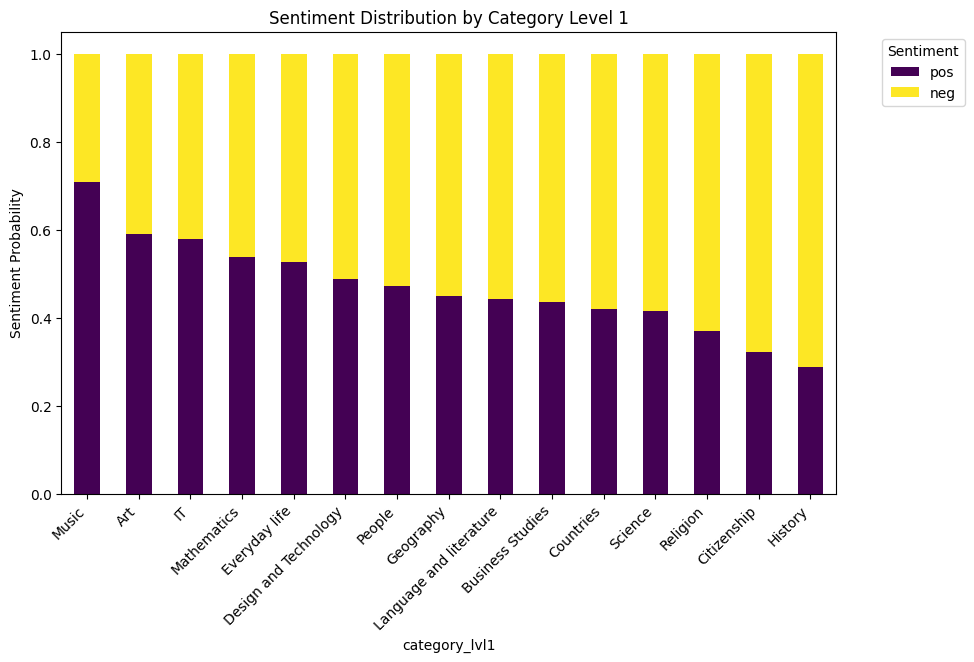

In [241]:
temp = temp.drop(columns=['sentiment'])
temp[['neg', 'pos']] = temp[['neg', 'pos']].div(temp[['neg', 'pos']].sum(axis=1), axis=0)

temp = temp.sort_values(by='pos', ascending=False)

# Plotting
ax = temp.plot(kind='bar',x='category_lvl1',y=['pos', 'neg'], stacked=True, colormap='viridis', figsize=(10, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Sentiment Distribution by Category Level 1')
plt.ylabel('Sentiment Probability')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')



As can be seen, Music is seems to be more positive than the other topics. Let's take a closer look at the distribution of articles falling into this topic:

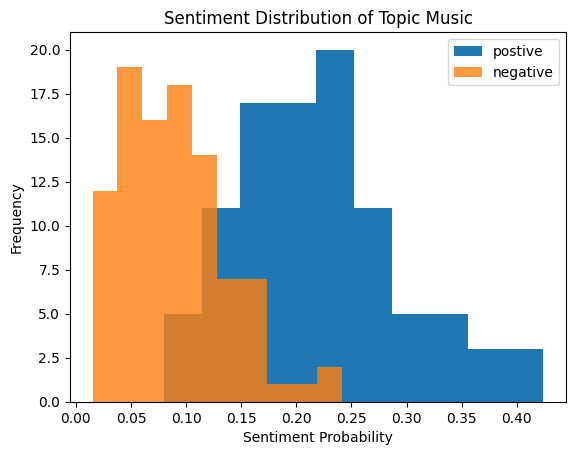

In [252]:
plt.hist(articles_df[articles_df.category_lvl1 =='Music'].pos, label='postive')
plt.hist(articles_df[articles_df.category_lvl1 =='Music'].neg, label='negative', alpha=0.8)

plt.title('Sentiment Distribution of Topic Music')
plt.xlabel('Sentiment Probability')
plt.ylabel('Frequency')

plt.legend()

The positive sentiment distribution is higher than the negative sentiment distribution. 

### Evaluate on Level-2 Topics

In [262]:
temp = articles_df.copy().groupby('category_lvl2')[['neg', 'pos']].mean().reset_index()
category_mapping = articles_df.set_index('category_lvl2')['category_lvl1'].to_dict()
temp['category_lvl1'] = temp.category_lvl2.map(category_mapping)
temp['sentiment'] = 0  # Default class is neutral (0)

# Assigning class labels based on conditions
temp.loc[temp['neg'] > temp['neg'].mean(), 'sentiment'] = -1  # Negative class
temp.loc[temp['pos'] > temp['pos'].mean(), 'sentiment'] = 1  # Positive class

temp

,category_lvl2,neg,pos,category_lvl1,sentiment
0,Actors models and celebrities,0.123907,0.196998,People,1
1,African Geography,0.164504,0.120365,Geography,0
2,Air and Sea transport,0.159193,0.148336,Design and Technology,1
3,Ancient History Classical History and Mythology,0.177526,0.089305,History,-1
4,Animal and Human Rights,0.294224,0.081329,Citizenship,-1
...,...,...,...,...,...
96,Theatre,0.137777,0.169887,Language and literature,1
97,USA Presidents,0.223327,0.112681,People,-1
98,Websites and the Internet,0.172756,0.205889,IT,1
99,World War II,0.328232,0.072016,History,-1


In [263]:
temp.to_csv('topic_lv2_sentiment.csv', index=False)

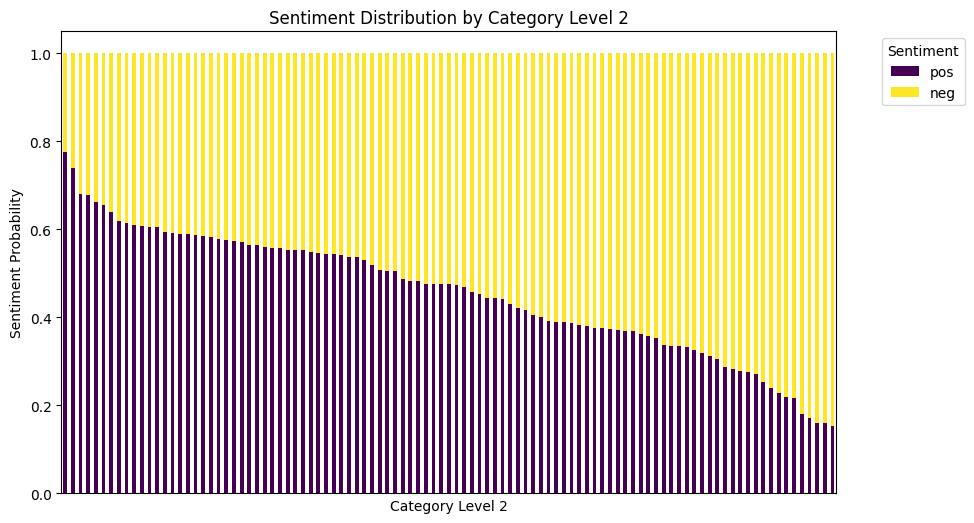

In [264]:
temp = temp.drop(columns=['sentiment'])
temp[['neg', 'pos']] = temp[['neg', 'pos']].div(temp[['neg', 'pos']].sum(axis=1), axis=0)

temp = temp.sort_values(by='pos', ascending=False)

# Plotting
ax = temp.plot(kind='bar',ax=None, stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Sentiment Distribution by Category Level 2')
ax.set_xticks([])
plt.xlabel('Category Level 2')
plt.ylabel('Sentiment Probability')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')



In [269]:
print("Two most positive topics are: ")
temp.category_lvl2.iloc[:2]

Two most positive topics are: 


65    Musical genres styles eras and events
23                         Computing People
Name: category_lvl2, dtype: object

In [271]:
print("The most negative topics are: ")
temp.category_lvl2.iloc[-5:]

The most negative topics are: 


99          World War II
82        Recent History
79     Pre 1900 Military
67     Natural Disasters
25    Conflict and Peace
Name: category_lvl2, dtype: object

There appear to be multiple topics having extreme sentiment scores, especially negative topics at this level. In fact, these negative topics are about War and Disaster so it is reasonable that they are more negative.